In [4]:
import sys
sys.path.insert(0, 'src') 
sys.path.insert(0, '/data/ch52669/gene_interaction/tot-gene-sets/MedAgents') 
import os
import json
from functools import partial

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
import argparse
from tot.methods.bfs import solve
from tot.tasks.bio_name import Bio_Name

AttributeError: partially initialized module 'nltk' has no attribute 'internals' (most likely due to a circular import)

In [ ]:
import argparse

medagents_config = {'model_name':'gpt-3.5-turbo-1106', \
                    'method':'syn_verif', \
                    'max_attempt_vote':3,\
                    'ans_num':2,\
                    'numerical':True
                   }

tot_config = {'backend':'gpt-3.5-turbo-1106', 'temperature':0.7, 'task':'bio_name', 'naive_run':False, \
              'prompt_sample':None, 'method_generate':'sample_bionames', \
              'method_evaluate':'medagents_w_tools', 'method_select':'greedy', \
              'n_generate_sample':3, 'n_evaluate_sample':2, 'n_select_sample':2, \
              'source':'GO:BP', 'bio_type':"Biological Process",'filter_method':'sim', \
              'filter_size':5, 'voting_setting':None}

args_config = {**medagents_config, **tot_config}


args = argparse.Namespace(**args_config)
print('args', args)
task = Bio_Name()

In [ ]:
def test_example(args, task, idx):
    label = task.get_label(idx)
    final_answer, ys, steps, trie = solve(args, task, idx)
    return final_answer, ys, steps, label, trie

In [ ]:
final_answer, ys, steps, label, trie = test_example(args, task, 1)

In [ ]:
dot = trie.visualize()

In [ ]:
ids = [0,1,2]
values = [1,0,0]
sorted(ids, key=lambda x: values[x], reverse=True)[:1]

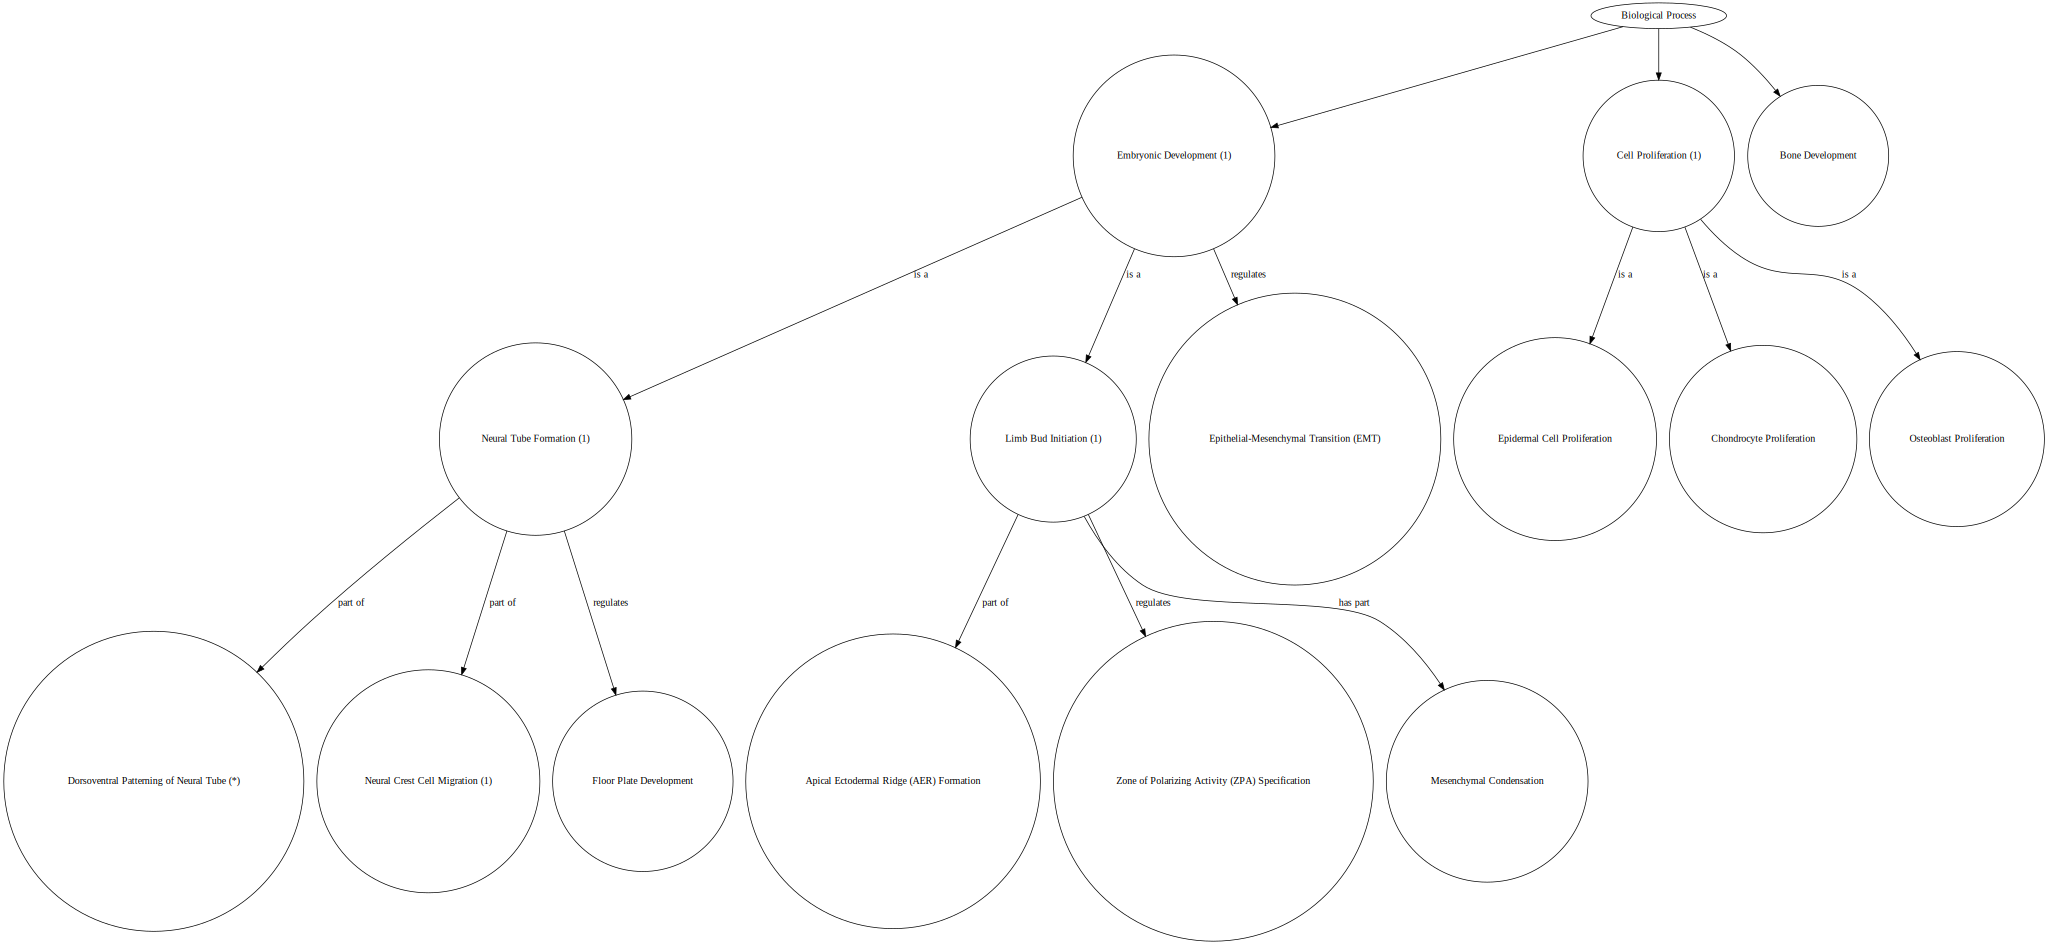

In [8]:
dot

In [9]:
final_answer

'Dorsoventral Patterning of Neural Tube'

In [10]:
label

'morphogenesis of an epithelial fold\n'

In [15]:
chr(65+4)

'E'

In [17]:
len({'f':2, 'g':3})

2